## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
# from fbprophet import Prophet
import prophet

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Read and Process the Data

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [4]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [5]:
print(df["Product"].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [6]:
df["Year"] = df['Time Date'].apply(lambda x: str(x)[-4:])
df["Month"] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df["Day"] = df['Time Date'].apply(lambda x: str(x)[-8:-6])
df["ds"] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])

In [7]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [8]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [9]:
df.drop(['Time Date', 'Year', 'Month', 'Day', 'Product', 'Store'], axis=1, inplace=True)

In [10]:
df.columns = ['y', 'ds']

In [11]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


## Train Model

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
m = prophet.Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

15:33:33 - cmdstanpy - INFO - Chain [1] start processing
15:33:33 - cmdstanpy - INFO - Chain [1] done processing


## Forecast Away

In [14]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.708172,669.442335,4140.222859,3042.708172,3042.708172,-636.758612,-636.758612,-636.758612,472.568897,...,16.615617,16.615617,16.615617,-1125.943126,-1125.943126,-1125.943126,0.0,0.0,0.0,2405.949560
1,2018-01-02,3043.440046,847.080235,3927.100868,3043.440046,3043.440046,-646.928879,-646.928879,-646.928879,472.568897,...,-11.291430,-11.291430,-11.291430,-1108.206346,-1108.206346,-1108.206346,0.0,0.0,0.0,2396.511167
2,2018-01-03,3044.171921,981.838482,3976.544417,3044.171921,3044.171921,-621.144750,-621.144750,-621.144750,472.568897,...,-4.423866,-4.423866,-4.423866,-1089.289781,-1089.289781,-1089.289781,0.0,0.0,0.0,2423.027170
3,2018-01-04,3044.903795,786.497523,4104.243444,3044.903795,3044.903795,-574.201906,-574.201906,-574.201906,472.568897,...,22.497946,22.497946,22.497946,-1069.268749,-1069.268749,-1069.268749,0.0,0.0,0.0,2470.701889
4,2018-01-05,3045.635670,989.865244,4063.347892,3045.635670,3045.635670,-610.268414,-610.268414,-610.268414,472.568897,...,-34.566066,-34.566066,-34.566066,-1048.271245,-1048.271245,-1048.271245,0.0,0.0,0.0,2435.367255


In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1440,2021-12-12,4525.793038,2092.479959,5206.598256,4503.430009,4550.659764,-945.084530,-945.084530,-945.084530,472.568897,...,25.187096,25.187096,25.187096,-1442.840522,-1442.840522,-1442.840522,0.0,0.0,0.0,3580.708508
1441,2021-12-13,4526.879415,2066.584945,5195.233881,4504.412278,4551.824025,-930.014642,-930.014642,-930.014642,472.568897,...,16.615617,16.615617,16.615617,-1419.199156,-1419.199156,-1419.199156,0.0,0.0,0.0,3596.864773
1442,2021-12-14,4527.965791,1991.866704,5085.348179,4505.397173,4552.988286,-935.072355,-935.072355,-935.072355,472.568897,...,-11.291430,-11.291430,-11.291430,-1396.349822,-1396.349822,-1396.349822,0.0,0.0,0.0,3592.893437
1443,2021-12-15,4529.052168,2020.095000,5218.029241,4506.382068,4554.167090,-906.396368,-906.396368,-906.396368,472.568897,...,-4.423866,-4.423866,-4.423866,-1374.541399,-1374.541399,-1374.541399,0.0,0.0,0.0,3622.655800
1444,2021-12-16,4530.138545,2112.527076,5203.136769,4507.366963,4555.390835,-858.888870,-858.888870,-858.888870,472.568897,...,22.497946,22.497946,22.497946,-1353.955713,-1353.955713,-1353.955713,0.0,0.0,0.0,3671.249675


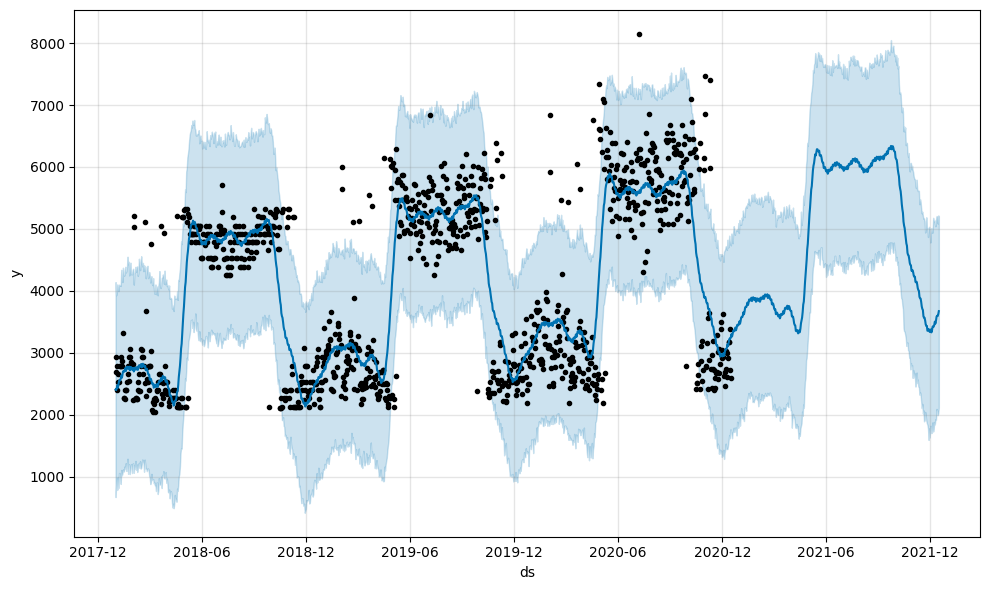

In [16]:
plot = m.plot(forecast)

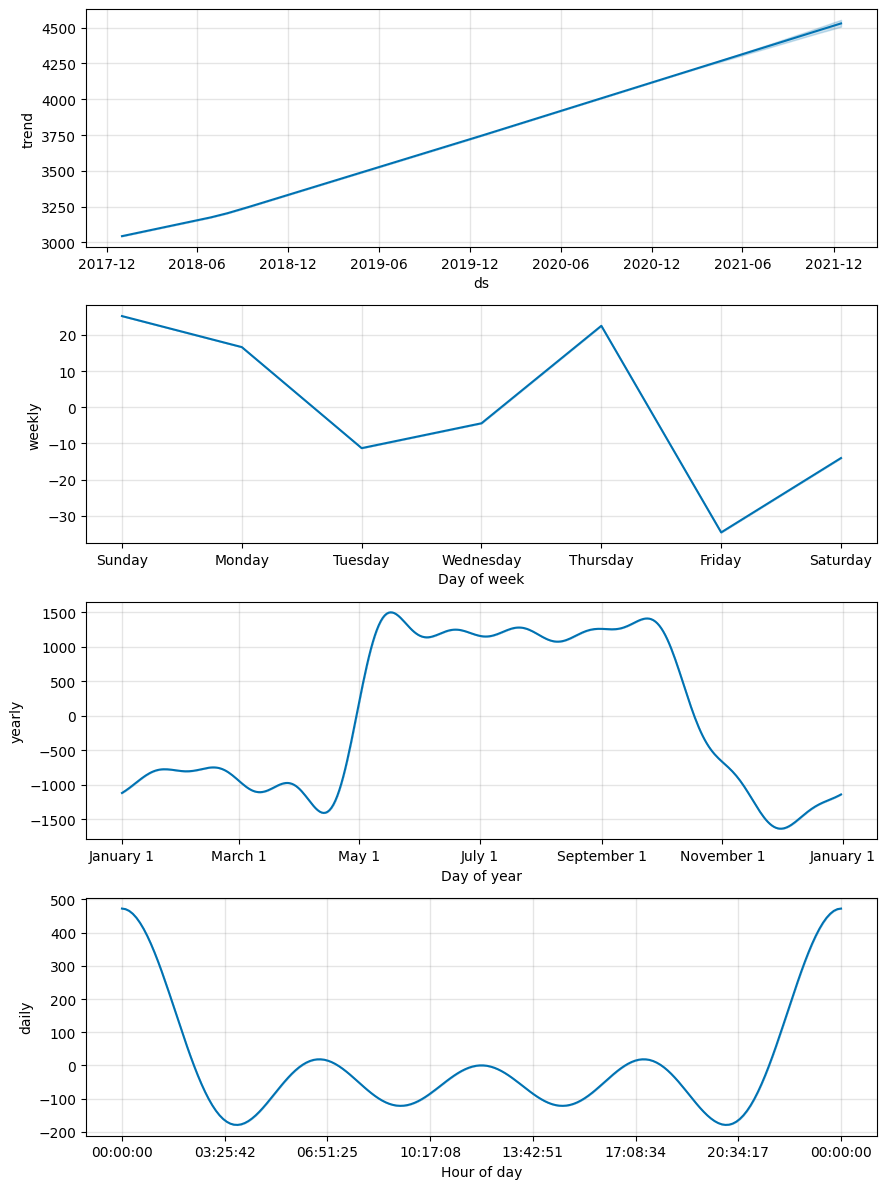

In [17]:
plot2 = m.plot_components(forecast)